# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the dataset


In [2]:
df = pd.read_csv("/kaggle/input/suicides-in-india-data-collection/Cause-wise Distribution_2021.csv")


In [3]:
df.head()

,Sl.No,Cause,Below 18 years - Male,Below 18 years - Female,Below 18 years - Transgender,Below 18 years - Total,18 and Above-Below 30 years - Male,18 and Above-Below 30 years - Female,18 and Above-Below 30 years - Transgender,18 and Above-Below 30 years - Total,...,45 and Above-Below 60 years - Transgender,45 and Above-Below 60 years - Total,60 years & Above - Male,60 years & Above - Female,60 years & Above - Transgender,60 years & Above - Total,Total - Male,Total - Female,Total - Transgender,Total - Total
0,1,Bankruptcy or Indebtedness,16,10,0,26,1100,125,0,1225,...,0,1928,426,29,0,455,5879,482,0,6361
1,2,Marriage Related Issues (Total),68,126,0,194,1772,2631,1,4404,...,0,500,61,10,0,71,3833,4069,1,7903
2,2,2.1 Non Settlement of Marriage,14,42,0,56,867,644,0,1511,...,0,116,9,1,0,10,1616,1031,0,2647
3,2,2.2 Dowry Related Issues,1,22,0,23,120,1137,1,1258,...,0,17,6,1,0,7,220,1503,1,1724
4,2,2.3 Extra Marital Affairs,34,17,0,51,345,301,0,646,...,0,129,20,1,0,21,855,593,0,1448


## Summary statistics for the dataset


In [4]:
print(df.describe())


       Below 18 years - Male  Below 18 years - Female  \
count              31.000000                31.000000   
mean              348.838710               395.096774   
std               942.842443              1046.011229   
min                 0.000000                 0.000000   
25%                 8.000000                15.000000   
50%                38.000000                31.000000   
75%               292.000000               391.000000   
max              5075.000000              5655.000000   

       Below 18 years - Transgender  Below 18 years - Total  \
count                     31.000000               31.000000   
mean                       0.129032              744.064516   
std                        0.499462             1987.604872   
min                        0.000000                0.000000   
25%                        0.000000               24.500000   
50%                        0.000000               69.000000   
75%                        0.000000          

## Explore the unique causes in the dataset


In [5]:
unique_causes = df['Cause'].unique()
print("Unique Causes:")
print(unique_causes)

Unique Causes:
['Bankruptcy or Indebtedness' 'Marriage Related Issues (Total)'
 '2.1 Non Settlement of Marriage' '2.2 Dowry Related Issues'
 '2.3 Extra Marital Affairs' '2.4 Divorce' '2.5 Others'
 'Failure in Examination' 'Impotency/Infertility' 'Family Problems'
 'Illness (Total)' '6.1 AIDS/STD' '6.2 Cancer' '6.3 Paralysis'
 '6.4 Insanity/ Mental Illness' '6.5 Other Prolonged Illness'
 'Death of Dear Person' 'Drug Abuse/Alcoholic Addiction'
 'Fall in Social Reputation' 'Ideological Causes/Hero Worshipping'
 'Love Affairs' 'Poverty' 'Unemployment' 'Property Dispute'
 'Suspected/ Illicit Relation (Other than Sl. No. 2.3)'
 'Illegitimate Pregnancy (Other thanSl. No. 2.3)'
 'Physical Abuse (Rape, etc.)' 'Professional/Career Problem'
 'Causes Not Known' 'Other Causes' 'Total']


## Calculate the total suicides for each cause


In [6]:
df['Total_Suicides'] = df.iloc[:, 2:].sum(axis=1)

## Visualization: Total suicides for each cause


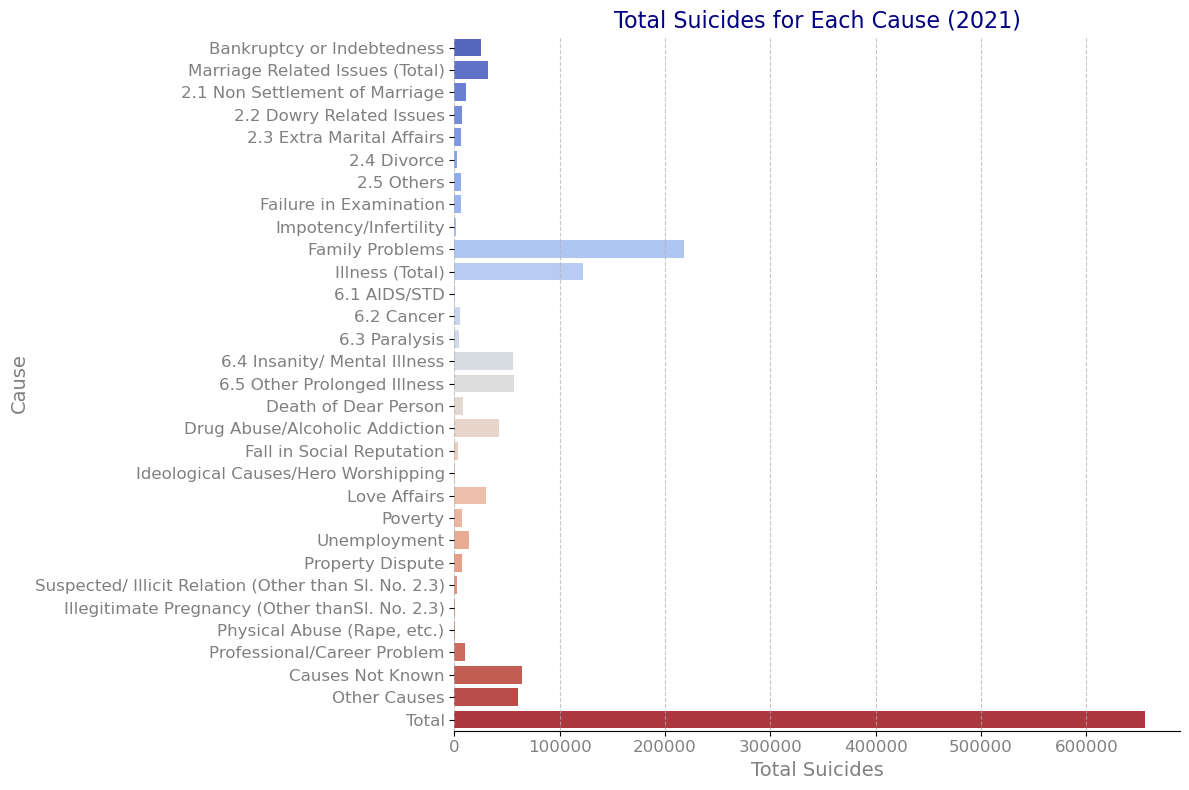

In [7]:
custom_palette = sns.color_palette("coolwarm", n_colors=len(df))

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Suicides', y='Cause', data=df, palette=custom_palette)
plt.xlabel("Total Suicides", fontsize=14, color='gray')
plt.ylabel("Cause", fontsize=14, color='gray')
plt.title("Total Suicides for Each Cause (2021)", fontsize=16, color='navy')
plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True)
plt.tight_layout()
plt.show()

## Top 10 causes with the highest total suicides


In [8]:
top_10_causes = df.nlargest(10, 'Total_Suicides')


## Visualization: Top 10 causes with the highest total suicides


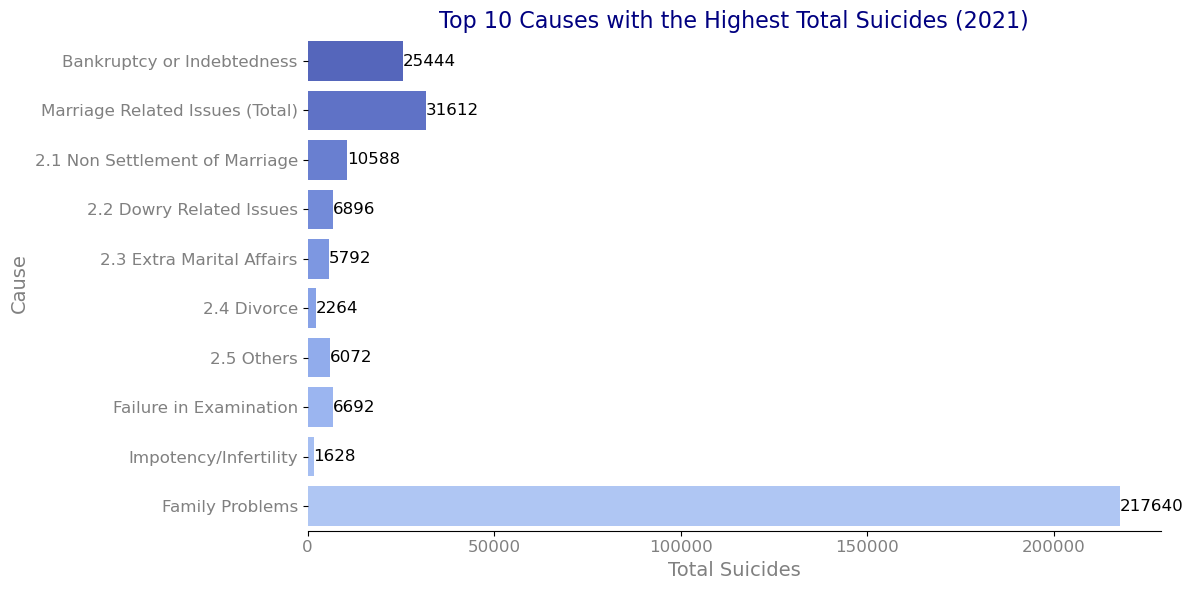

In [9]:
# Sort the data by total suicides in descending order
data = df.sort_values(by='Total_Suicides', ascending=False)

# Choose a custom color palette
custom_palette = sns.color_palette("coolwarm", n_colors=len(data))

# Cool and awesome bar plot: Top 10 Causes with the Highest Total Suicides
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Total_Suicides', y='Cause', data=df.head(10), palette=custom_palette)
plt.xlabel("Total Suicides", fontsize=14, color='gray')
plt.ylabel("Cause", fontsize=14, color='gray')
plt.title("Top 10 Causes with the Highest Total Suicides (2021)", fontsize=16, color='navy')

# Display values on the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=12, color='black')

plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
sns.despine(left=True)
plt.tight_layout()
plt.show()

## Percentage of total suicides for each cause


In [10]:
# Calculate the total suicides for each cause
df['Total_Suicides'] = data.iloc[:, 2:].sum(axis=1)

# Group the data by cause and sum the total suicides for each cause
grouped_data = df.groupby("Cause", as_index=False)["Total_Suicides"].sum()

# Calculate the percentage of total suicides for each cause
grouped_data['Percentage'] = (grouped_data['Total_Suicides'] / grouped_data['Total_Suicides'].sum()) * 100

## Visualization: Percentage of total suicides for each cause


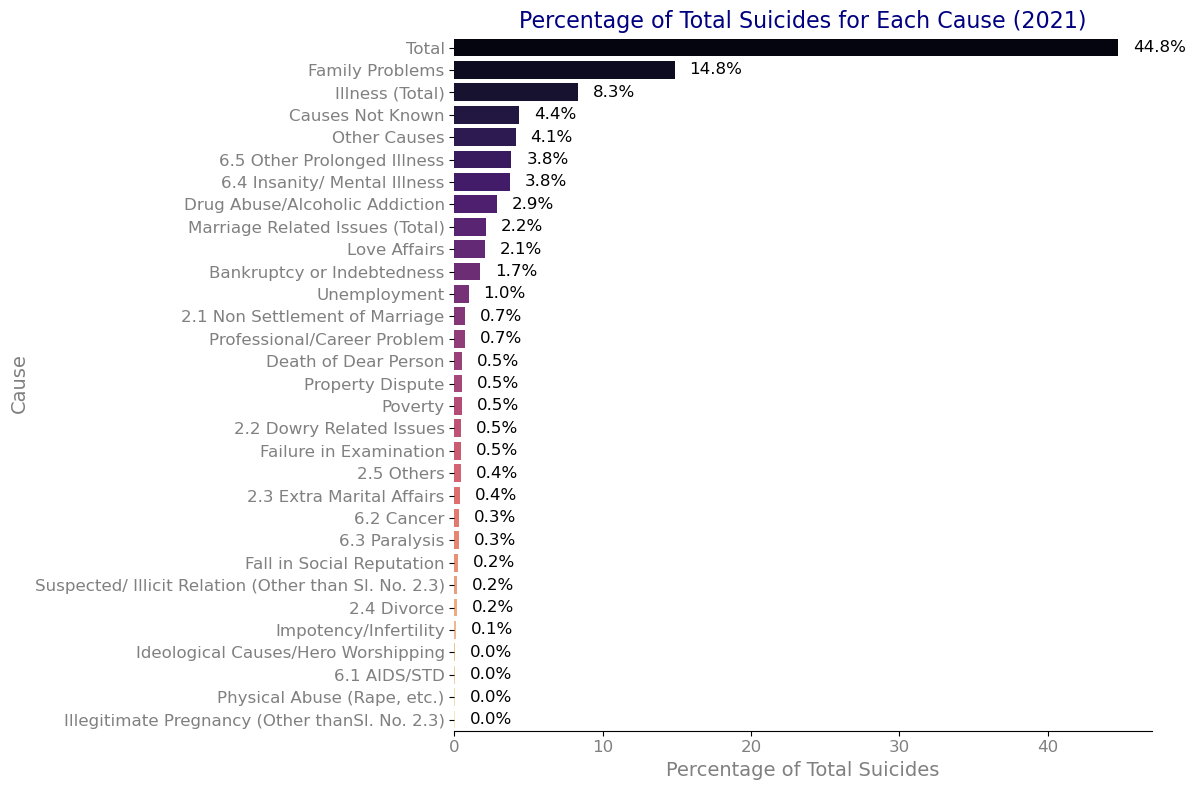

In [11]:
# Sort the data by percentage in descending order
grouped_data = grouped_data.sort_values(by='Percentage', ascending=False)

# Choose a cool and easy-to-understand color palette
custom_palette = sns.color_palette("magma", n_colors=len(grouped_data))

# Cool and easy-to-understand bar plot: Percentage of Total Suicides for Each Cause
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Percentage', y='Cause', data=grouped_data, palette=custom_palette)
plt.xlabel("Percentage of Total Suicides", fontsize=14, color='gray')
plt.ylabel("Cause", fontsize=14, color='gray')
plt.title("Percentage of Total Suicides for Each Cause (2021)", fontsize=16, color='navy')

# Add informative annotations to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=12, color='black')

plt.xticks(fontsize=12, color='gray')
plt.yticks(fontsize=12, color='gray')
sns.despine(left=True)
plt.tight_layout()
plt.show()

## Gender-wise distribution of suicides for the top cause


In [12]:
top_cause = top_10_causes['Cause'].iloc[0]
gender_distribution_top_cause = df[df['Cause'] == top_cause][['Cause', 'Total - Male', 'Total - Female', 'Total - Transgender']]


## Visualization: Gender-wise distribution of suicides for the top cause


/tmp/ipykernel_20/287767434.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_distribution_top_cause = data[df['Cause'] == top_cause][['Cause', 'Total - Male', 'Total - Female', 'Total - Transgender']]


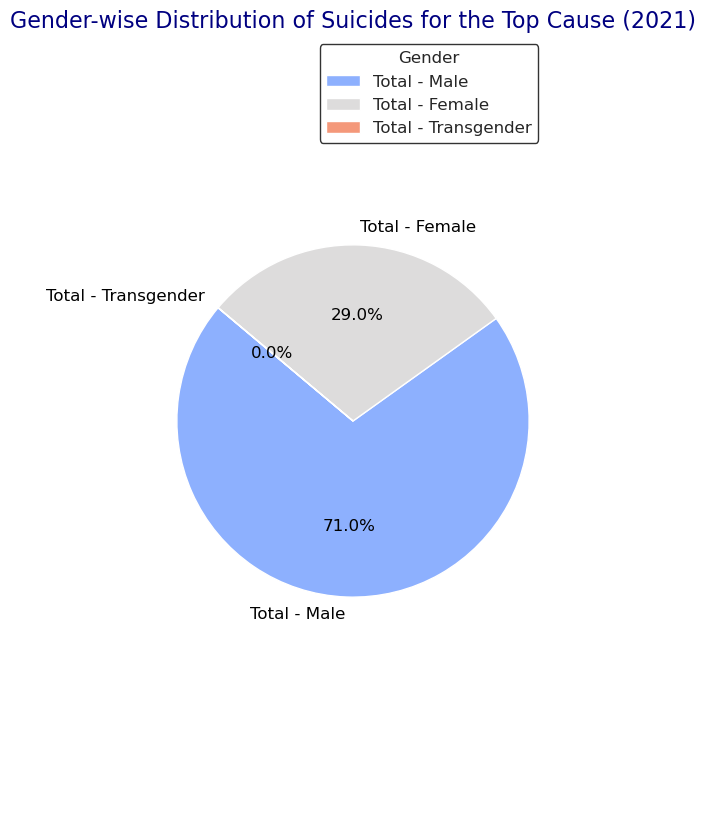

In [13]:
# Assuming you have calculated the total suicides and grouped the data by the top cause
top_cause = "Family Problems"  # Replace this with the actual top cause

gender_distribution_top_cause = data[df['Cause'] == top_cause][['Cause', 'Total - Male', 'Total - Female', 'Total - Transgender']]

# Set the cause as the index for better visualization
gender_distribution_top_cause = gender_distribution_top_cause.set_index('Cause')

# Use the latest Seaborn style
sns.set_theme(style='whitegrid')

# Cool and latest pie chart: Gender-wise Distribution of Suicides for the Top Cause
plt.figure(figsize=(5,10))
colors = sns.color_palette('coolwarm', n_colors=len(gender_distribution_top_cause.columns))
plt.pie(gender_distribution_top_cause.iloc[0], labels=gender_distribution_top_cause.columns, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'color': 'black'})
plt.title("Gender-wise Distribution of Suicides for the Top Cause (2021)", fontsize=16, color='navy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Gender", fontsize=12, title_fontsize=12, loc='upper right', facecolor='white', edgecolor='black')
plt.show()

## I will continue the analysis soon to gain deeper insights and uncover valuable patterns.